## L'idée de ceci est de faire un code qui permette d'extraire automatiquement les données du site

Ce notebook implémente 3 fonctions :
* Une qui va chercher els code bss des stations avec suffisament de mesures
* Une qui, pur un code bss donné, renvoie les mesuresde la stations
* Une troisième qui, pour un code bss donné, affiche la série temporelle des mesures

In [40]:
import requests
import json
import pandas as pd
import numpy as np

## Je commence par faire quelques tests pour voir commet faire

In [12]:
out=requests.get("https://hubeau.eaufrance.fr/api/v1/niveaux_nappes/stations?format=json&page=1&size=20")
#out.headers['content-type']
stations=json.loads(out.text) # data est la donée json qui est affichée sur le site hubeau,  data['data'] est une liste, de dictionnaires correspondant aux données
#stations est au format json
data=pd.json_normalize(stations['data'])
# j'extrais data, que je gere en table pandas


data[['code_bss', 'date_debut_mesure', 'date_fin_mesure','nom_commune', 'x', 'y','geometry.coordinates', 'nb_mesures_piezo']] # j'ai selectionné des champs qui pouvaient être utiles

Npiezmin=10

data[['code_bss','nb_mesures_piezo','nom_commune']].loc[data['nb_mesures_piezo']>Npiezmin] # on récupère les code BSS des balises qui ont plus de Npiezmin mesures


,code_bss,nb_mesures_piezo,nom_commune
2,08272X0745/PZ-,125,Bègles
4,12288X0089/PIEZO.,6217,Saint-Pierre
5,04454X0089/PK11.0,70,Kembs
6,04138X0067/PK13.0,49,Niffer
7,04134X0057/PK23.0,52,Ottmarsheim
8,04454X0064/PK3.0,65,Rosenau
9,04138X0071/PK14.0,58,Petit-Landau
10,04134X0059/PK24.0,53,Bantzenheim
11,04134X0060/PK25.0,53,Chalampé
12,04138X0076/PK16.0,49,Petit-Landau


In [13]:
pd.json_normalize(json.loads(out.text))

,count,first,last,prev,next,api_version,data
0,22363,https://hubeau.eaufrance.fr/api/v1/niveaux_nap...,https://hubeau.eaufrance.fr/api/v1/niveaux_nap...,None,https://hubeau.eaufrance.fr/api/v1/niveaux_nap...,1.4.0,"[{'code_bss': '02201X0105/H2(S7)', 'urn_bss': ..."


In [14]:
data.columns

Index(['code_bss', 'urn_bss', 'date_debut_mesure', 'date_fin_mesure',
       'code_commune_insee', 'nom_commune', 'x', 'y', 'codes_bdlisa',
       'urns_bdlisa', 'bss_id', 'altitude_station', 'nb_mesures_piezo',
       'code_departement', 'nom_departement', 'libelle_pe',
       'profondeur_investigation', 'codes_masse_eau_edl', 'noms_masse_eau_edl',
       'urns_masse_eau_edl', 'date_maj', 'geometry.type', 'geometry.crs.type',
       'geometry.crs.properties.name', 'geometry.coordinates'],
      dtype='object')

## Maintenant on écrit des fonctions qui vont récupérer les données toutes seules

In [15]:
def code_bss_piezmin(Npiezmin=10,Nech=20,Npage=1):
    """
    Extrait Nech valeurs de la base de données, celles correspondantes à la page Npage. Ensuite selection des code bss des stations avec plus de Npiezmin mesures.
    Renvoie un dataFrame pandas contenant des données utiles.
    """
    out=requests.get(f"https://hubeau.eaufrance.fr/api/v1/niveaux_nappes/stations?format=json&page={Npage}&size={Nech}")
    stations=json.loads(out.text) # data est la donée json qui est affichée sur le site hubeau,  data['data'] est une liste, de dictionnaires correspondant aux données
    #stations est au format json
    data=pd.json_normalize(stations['data']) # j'extrais data, que je gere en table pandas
    return data[['code_bss','nb_mesures_piezo','nom_commune','code_departement','geometry.coordinates']].loc[data['nb_mesures_piezo']>Npiezmin] # on récupère les code BSS de

In [16]:
code_bss_piezmin(Npiezmin=300,Nech=300)

,code_bss,nb_mesures_piezo,nom_commune,code_departement,geometry.coordinates
4,12288X0089/PIEZO.,6217,Saint-Pierre,974,"[55.4596161419439, -21.3179680681576]"
22,03423X0020/100,1582,Guémar,68,"[7.39685887052413, 48.1902788030478]"
23,03423X0056/100,3190,Guémar,68,"[7.39671567147129, 48.1901951190304]"
28,03428X0021/200,994,Marckolsheim,67,"[7.54295244822417, 48.1343175518514]"
39,07011X0117/RN00,795,Béon,01,"[5.75708248570841, 45.8476732810198]"
40,06216X0228/P30-10,4659,Paray-sous-Briailles,03,"[3.40173003436263, 46.2728651316311]"
48,05068X0028/SP010,10897,Épine,85,"[-2.24012886096318, 46.9903558366809]"
49,01146X0139/110,471,Cattenom,57,"[6.23680902043496, 49.3968088589725]"
62,03431X0022/210,730,Schœnau,67,"[7.6450297033689, 48.2222927105892]"
66,09145X0057/N210,6763,Caderousse,84,"[4.75199081827216, 44.1102028076528]"


In [17]:
def extract_levels(code_bss):
    """
    Extrait les niveaux pour la balise quicorrespond au code BSS fourni
    Renvoie un dataFrame pandas

    /!\ Pour récupérer plusieurs échantillons, faire les requêtes code bss par code bss, ne pas lui donner une liste de codes d'un coup
    """
    out=requests.get(f"https://hubeau.eaufrance.fr/api/v1/niveaux_nappes/chroniques?code_bss={code_bss}")
    doneejson=json.loads(out.text)
    data=pd.json_normalize(doneejson['data'])
    return data[['date_mesure','timestamp_mesure','niveau_nappe_eau','profondeur_nappe']]

In [18]:
extract_levels("04454X0089/PK11.0") # j'ai entré une aderesse bss de dessus

,date_mesure,timestamp_mesure,niveau_nappe_eau,profondeur_nappe
0,1966-11-15,-98755200000,225.27,6.85
1,1966-12-16,-96076800000,224.85,7.27
2,1967-03-14,-88473600000,224.19,7.93
3,1967-04-11,-86054400000,224.17,7.95
4,1967-05-08,-83721600000,224.19,7.93
...,...,...,...,...
65,1973-10-28,120614400000,223.06,9.06
66,1973-10-29,120700800000,222.88,9.24
67,1973-11-05,121305600000,223.07,9.05
68,1973-11-27,123206400000,222.60,9.52


### Note 
Pour avoir une table numpyu avec les valeurs du niveau piezo par ex : 

    Extraire les données des niveaux piezo : D=data["niveaux_piezo"]
    
    Le converir en numpy : D.to_numpy()

In [19]:
levels=extract_levels("04454X0089/PK11.0")
levels['niveau_nappe_eau']


0     225.27
1     224.85
2     224.19
3     224.17
4     224.19
       ...  
65    223.06
66    222.88
67    223.07
68    222.60
69    222.42
Name: niveau_nappe_eau, Length: 70, dtype: float64

In [20]:
niveaunp=levels['niveau_nappe_eau'].to_numpy()
profondeur=levels['profondeur_nappe'].to_numpy()

In [21]:
datepd=pd.to_datetime(levels['date_mesure'])
dates=datepd.to_numpy()
dates[0]

numpy.datetime64('1966-11-15T00:00:00.000000000')

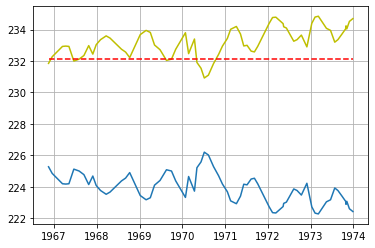

In [22]:
import matplotlib.pyplot as plt

plt.plot(dates,niveaunp)
plt.plot(dates,profondeur+225,color='y')
plt.plot(dates,profondeur+niveaunp,color='r',linestyle='--')
plt.grid()
plt.show()

Note : on voit que niveau nappe + profondeur = cte ... les deux données sont intimement liées

In [25]:
# J'écris donc une fonction qui permet de visualiser la donnée (en compilant tout ce que j'ai écrit plus haut)
# il faut numpy, pandas, requests et matplotlib pour cette fonction

def show_level(code_bss):
    levels=extract_levels(code_bss)
    niveaunp=levels['niveau_nappe_eau'].to_numpy()

    datepd=pd.to_datetime(levels['date_mesure'])
    dates=datepd.to_numpy()

    plt.figure()
    plt.plot(dates,niveaunp)
    plt.title(f"Mesure {code_bss}")
    plt.grid()
    plt.xlabel("Temps")
    plt.ylabel("Niveau")
    plt.show()

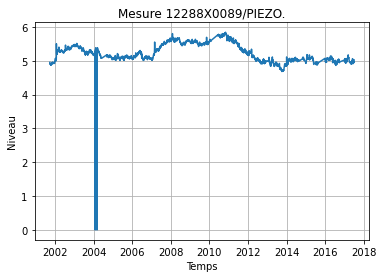

In [26]:
show_level("12288X0089/PIEZO.") # Balise a St Pierre, avec beaucoup de mesure et des valeurs abérrantes
# show_level("09892X0679/EXH70") # aussi beaucoup de valeurs

# show_level("08592X0175/FOR170") # étrange : celui ci ne marche pas

#show_level("00274X0010/F10")

In [56]:
code_bss_piezmin(Npiezmin=0,Nech=10)["code_departement"][1]

'75'

#### Pour mettre tous les points sur une carte (je l'ai passé en markdown car assez long)

stations=code_bss_piezmin(Npiezmin=0,Nech=20000)
coordonee=stations['geometry.coordinates'].to_numpy()
coordonee=np.array(list(coordonee)) # sinon coordonnee est un array de listes

coordonee=coordonee[(coordonee[:,1]>-20)*(coordonee[:,0]<20)*(coordonee[:,1]<55)*(coordonee[:,1]>35),:]

plt.scatter(coordonee[:,0],coordonee[:,1])
plt.savefig("France")
plt.show()

### Tracé avec des couleurs en fonctin du nombre de mesures 

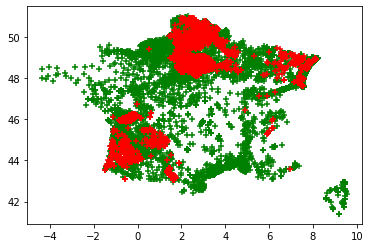

In [101]:
Nseuil=2

coordoneebien=stations.loc[stations['nb_mesures_piezo']>Nseuil]['geometry.coordinates'].to_numpy()
coordoneebien=np.array(list(coordoneebien)) # sinon coordonnee est un array de listes
coordoneebien=coordoneebien[(coordoneebien[:,1]>-20)*(coordoneebien[:,0]<20)*(coordoneebien[:,1]<55)*(coordoneebien[:,1]>35),:]
plt.scatter(coordoneebien[:,0],coordoneebien[:,1],marker='+',color="g")

coordoneebof=stations.loc[stations['nb_mesures_piezo']<Nseuil]['geometry.coordinates'].to_numpy()
coordoneebof=np.array(list(coordoneebof)) # sinon coordonnee est un array de listes
coordoneebof=coordoneebof[(coordoneebof[:,1]>-20)*(coordoneebof[:,0]<20)*(coordoneebof[:,1]<55)*(coordoneebof[:,1]>35),:]
plt.scatter(coordoneebof[:,0],coordoneebof[:,1],marker="+",color="r")



plt.savefig("France_nombre")
plt.show()